In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D
#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)
size_xlabels=30
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':size_xlabels,
         'ytick.labelsize':size_xlabels,
         'axes.labelsize': size_xlabels,
         'axes.titlesize': size_xlabels}
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
major_font=10
minor_font=4
plt.rcParams['xtick.major.size'] = major_font
plt.rcParams['xtick.major.width'] = minor_font
plt.rcParams['xtick.minor.size'] = major_font
plt.rcParams['xtick.minor.width'] = 2


plt.rcParams['ytick.major.size'] = major_font
plt.rcParams['ytick.major.width'] = minor_font
plt.rcParams['ytick.minor.size'] = major_font
plt.rcParams['ytick.minor.width'] = 2


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')




/tmp/ipykernel_923596/2945974469.py:19: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


In [7]:
import plots
## ANALYZING THE INSERT WITH TUNGSTEN + STEEL DATA
#FilePathReco="/home/bishnu/EIC/Data/hepmc/HCAL/FTFP_BERT_HP/"
FilePathReco="/home/bishnu/EIC/Data/From_Xilin/endcap_sim_root/"
Time_Threshold=50 #ns

#MIP=0.8#MeV for CALICE Analysis
MIP=0.6 # MeV for Hcal insert 

Gev_To_MeV=1000
Sigma_For_leakage=3
Mean_pions=[]
Mean_electrons=[]
Energy_Threshold=0.1*MIP  #(0.5 * MIP for calice analysis)
FIT_SIGMA=3
theta=20#.83
#theta=2.25
eta=plots.get_eta(theta)
print(eta)

1.7507239941348802


HELLO JELLO 10000


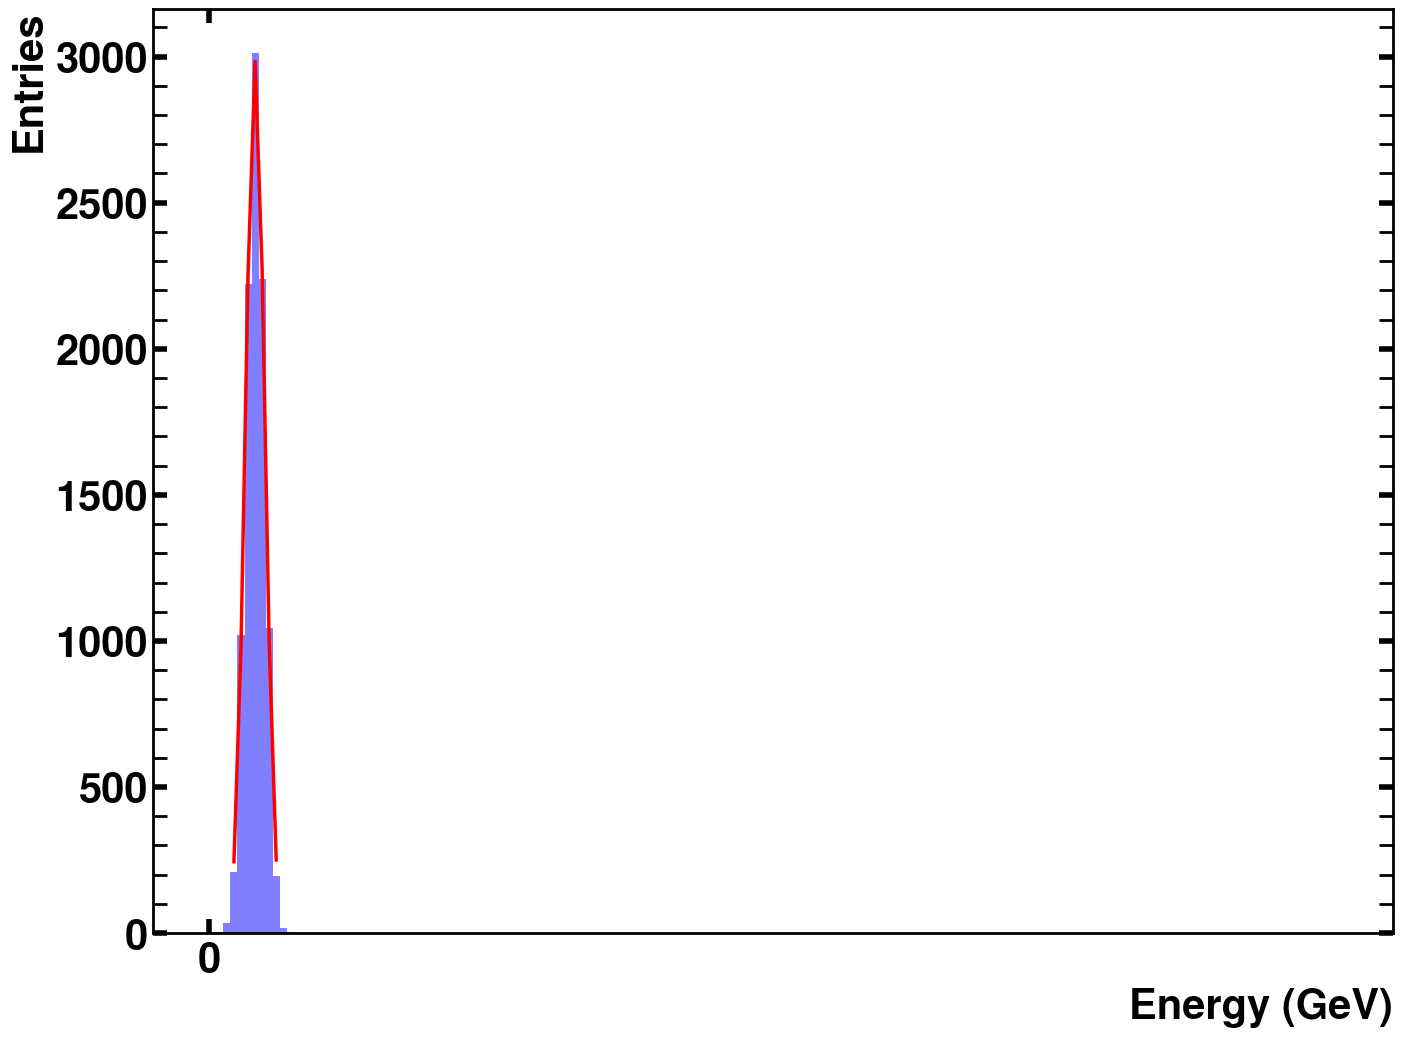

e_means_50=[0.41 ]
e_means_error_50=[0.001 ]
e_stds_50=[ 0.08 ]
e_stds_error_50=[ 0.001 ]
e_leaks_per_50=[ 0.420 ]
e_leaks_per_error_50=[ 0.0649 ]
e_resolutions_50=[ 0.20658 ]
e_resolutions_errors_50=[ 0.0035 ]


In [8]:
def get_fitted_mean_std(wt):
    ## This is for the weighted sum of the hcal and hcali
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    #energies=[10,20,30,40,50,60,80]
    #energies=[80]#,100]#,20,30,40,50,60,80, 100]
    #fileindex="deg_Fe-W" ## for insert file or HCAL orginal file
    fileindex="deg"
    #fileindex="deg_Fe-W_Sc35_Ab156" ## for insert with absorber 15.6 mm and Sc = 0.35 mm
    #fileindex="deg_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    if fileindex=='deg':
        prefix='W'
    elif fileindex=='deg_Fe-W':
        prefix='FeW'
   
    energies=[0.5]#,5,10, 20, 40, 50]#, 10, 20, 30, 50 ]#,20,30,40,50,60,80,100]
    particle='e-'
     
    for ienergy in energies:
        
        ## FOR THE ECAL Insert reading
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_ECAL(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## THIS IS ONLY FOR THE RESOLUTION OF THE HCAL INSERT   #_Insert
        
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,\
        pi_resolution,pi_resolution_error=plots.get_resolution(ene_good_wFe, ienergy, particle, Sigma_For_leakage, wt)
        #plots.get_resolution(ene_good_wFe, ienergy, particle, Sigma_For_leakage, wt)
        '''
        
        #----------------------------------------------------------------------
        ## READ ECAL 
        ene_wFe_h,time_wFe_h,PosRecoX_wFe_h,PosRecoY_wFe_h,PosRecoZ_wFe_h,mass_wFe_h,mom_wFe_h,energy_gen_wFe_h, \
        phi_wFe_h,ene_good_wFe_h=plots.read_rootfile_ECAL(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,\
        pi_resolution,pi_resolution_error=plots.get_resolution(ene_good_wFe_h, ienergy, particle, Sigma_For_leakage, 
                                                               wt)
        
        
        ## RESOLUTION HCAL + HCAL INSERT
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error, pi_resolution,\
        pi_resolution_error=plots.get_resolution_hcalall_weighted(wt,ene_good_wFe_h,ene_good_wFe, ienergy, \
                                                         particle,Sigma_For_leakage) 
        
        '''
        pi_means.append(pi_mean)
        pi_stds.append(pi_std)
        pi_means_error.append(pi_mean_error)
        pi_stds_error.append(pi_sigma_error)
        pi_resolutions.append(pi_resolution)
        pi_resolution_errors.append(pi_resolution_error)
        pi_leaks_per.append(pi_leak_per)
        pi_leaks_per_error.append(pi_leak_per_error)
        
    plots.print_decimal_pi_update('{0}'.format(Time_Threshold), particle, pi_means,  pi_means_error,  pi_stds,pi_stds_error, pi_leaks_per, \
                         pi_leaks_per_error, pi_resolutions, pi_resolution_errors)   
    
### WT ON IS FOR THE WEIGHTED SUM OF HCAL AND HCAL INSERT
get_fitted_mean_std('off')  


In [4]:
e_means_50=[0.41 ]
e_means_error_50=[0.001 ]
e_stds_50=[ 0.09 ]
e_stds_error_50=[ 0.001 ]
e_leaks_per_50=[ 2.510 ]
e_leaks_per_error_50=[ 0.1604 ]
e_resolutions_50=[ 0.22079 ]
e_resolutions_errors_50=[ 0.0023 ] 


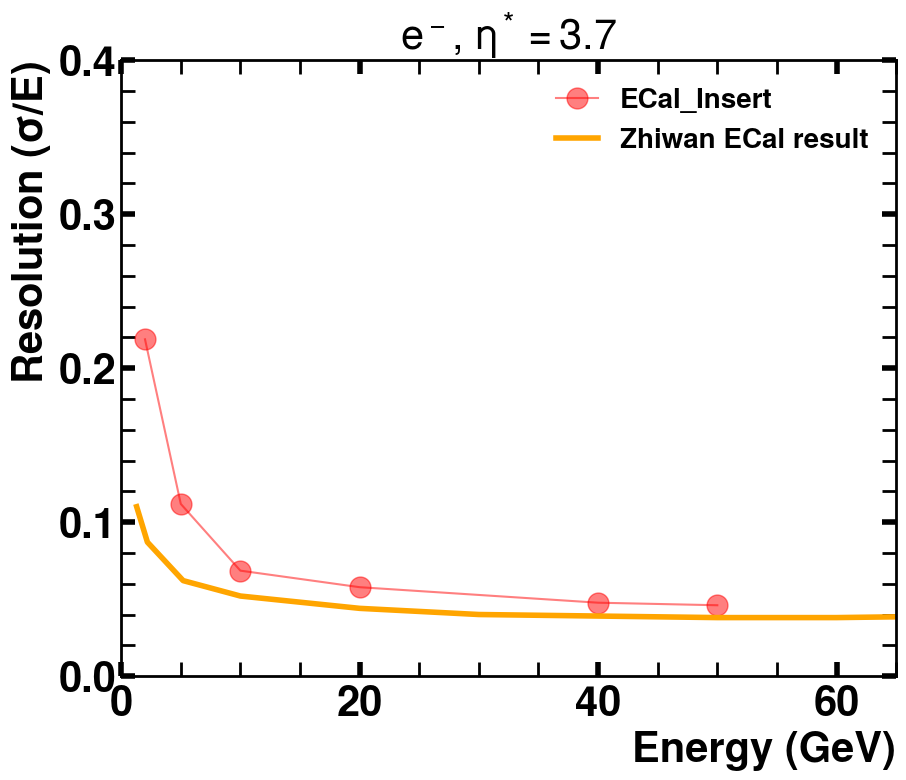

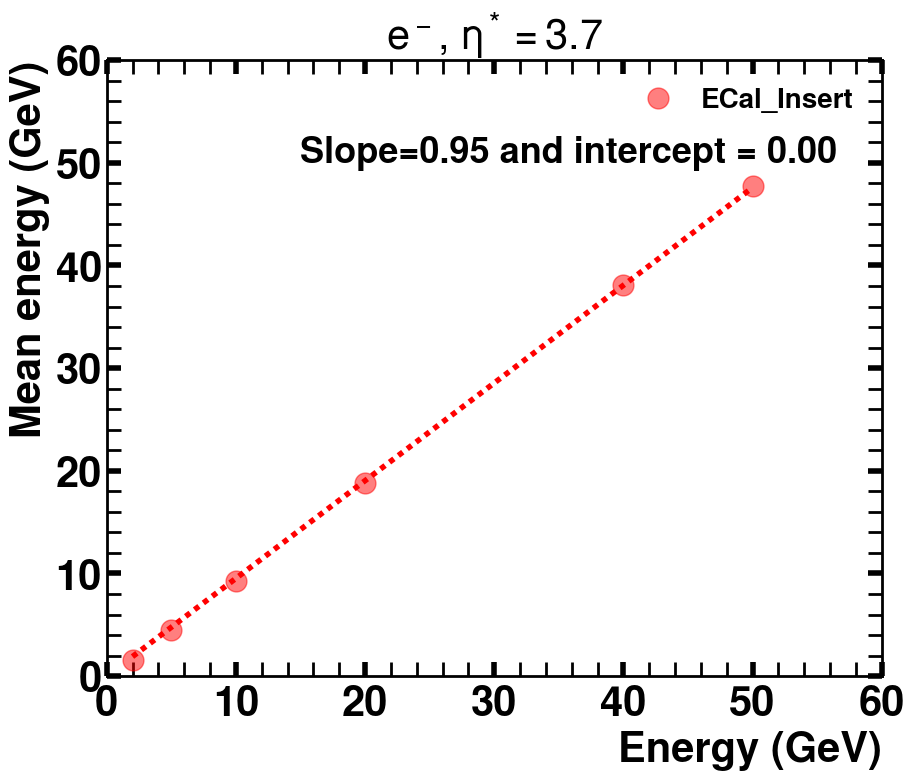

In [5]:
import pandas as pd
energies=[2, 5,  10, 20, 40, 50]#, 10, 20, 30, 50 ]
energies=np.asarray(energies)
e_means_50=[1.56,4.51,9.27,18.84,38.08,47.73 ]

e_stds_50=[ 0.34,0.50,0.64,1.09,1.81,2.20 ]

e_leaks_per_50=[ 6.210,8.750,9.090,2.370,1.580,0.950 ]
e_leaks_per_error_50=[ 0.2568,0.3085,0.3149,0.1558,0.1267,0.0979 ]
e_resolutions_50=[ 0.21869,0.11182,0.06848,0.05774,0.04767,0.04602 ]


file_name="zhiwan_ecal_resolution.csv"
df = pd.read_csv(f'{FilePathReco}{file_name}',header=None, names=['energy', 'resolution'], index_col=False)
df=df.sort_values(by=['energy'],ascending =True)

fig,ax = plt.subplots(1,1, figsize=(10, 8),sharex=True,sharey=True)
ax.plot(energies,e_resolutions_50 ,color="red",alpha=0.5,marker='o'
          ,markersize=15,label='ECal_Insert' )#  mfc='none' #,linestyle='None'




df.plot(x='energy',y='resolution',linestyle='solid',linewidth=4,color='orange',ax=ax,\
        label='Zhiwan ECal result')    

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_title('$e^-$, $\eta^*=3.7$')
ax.set_ylim(0,0.40)
ax.set_xlim(0,65)

plt.legend()
plt.show() 



fig,ax = plt.subplots(1,1, figsize=(10, 8),sharex=True,sharey=True)

ax.plot(energies,e_means_50 ,color="red",alpha=0.5,marker='o'
          ,markersize=15,label='ECal_Insert' ,linestyle='None')#  mfc='none' #

popt_pi,_popcov=curve_fit(plots.linear_fit,energies,e_means_50,p0=[0,25],bounds=(0,101))

c1=popt_pi[1]
ax.plot(energies,plots.linear_fit(energies,*popt_pi),color='r',linewidth='4',\
        linestyle=(0,(1,1)))
'''
z = np.polyfit(energies, e_means_50, 1)
f = np.poly1d(z)
ax.plot((0, max(energies)), (f(0), f(max(energies))),  color='r',linewidth='4',\
        linestyle=(0,(1,1)))
'''
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Mean energy (GeV)')
ax.set_title('$e^-$, $\eta^*=3.7$')
ax.set_ylim(0,60)
ax.set_xlim(0,60)
ax.text(15,50,'Slope={0:.2f} and intercept = {1:.2f}'.format(popt_pi[0],c1))

plt.legend()
plt.show() 

0       0
HELLO JELLO 10000
HELLO JELLO 10000


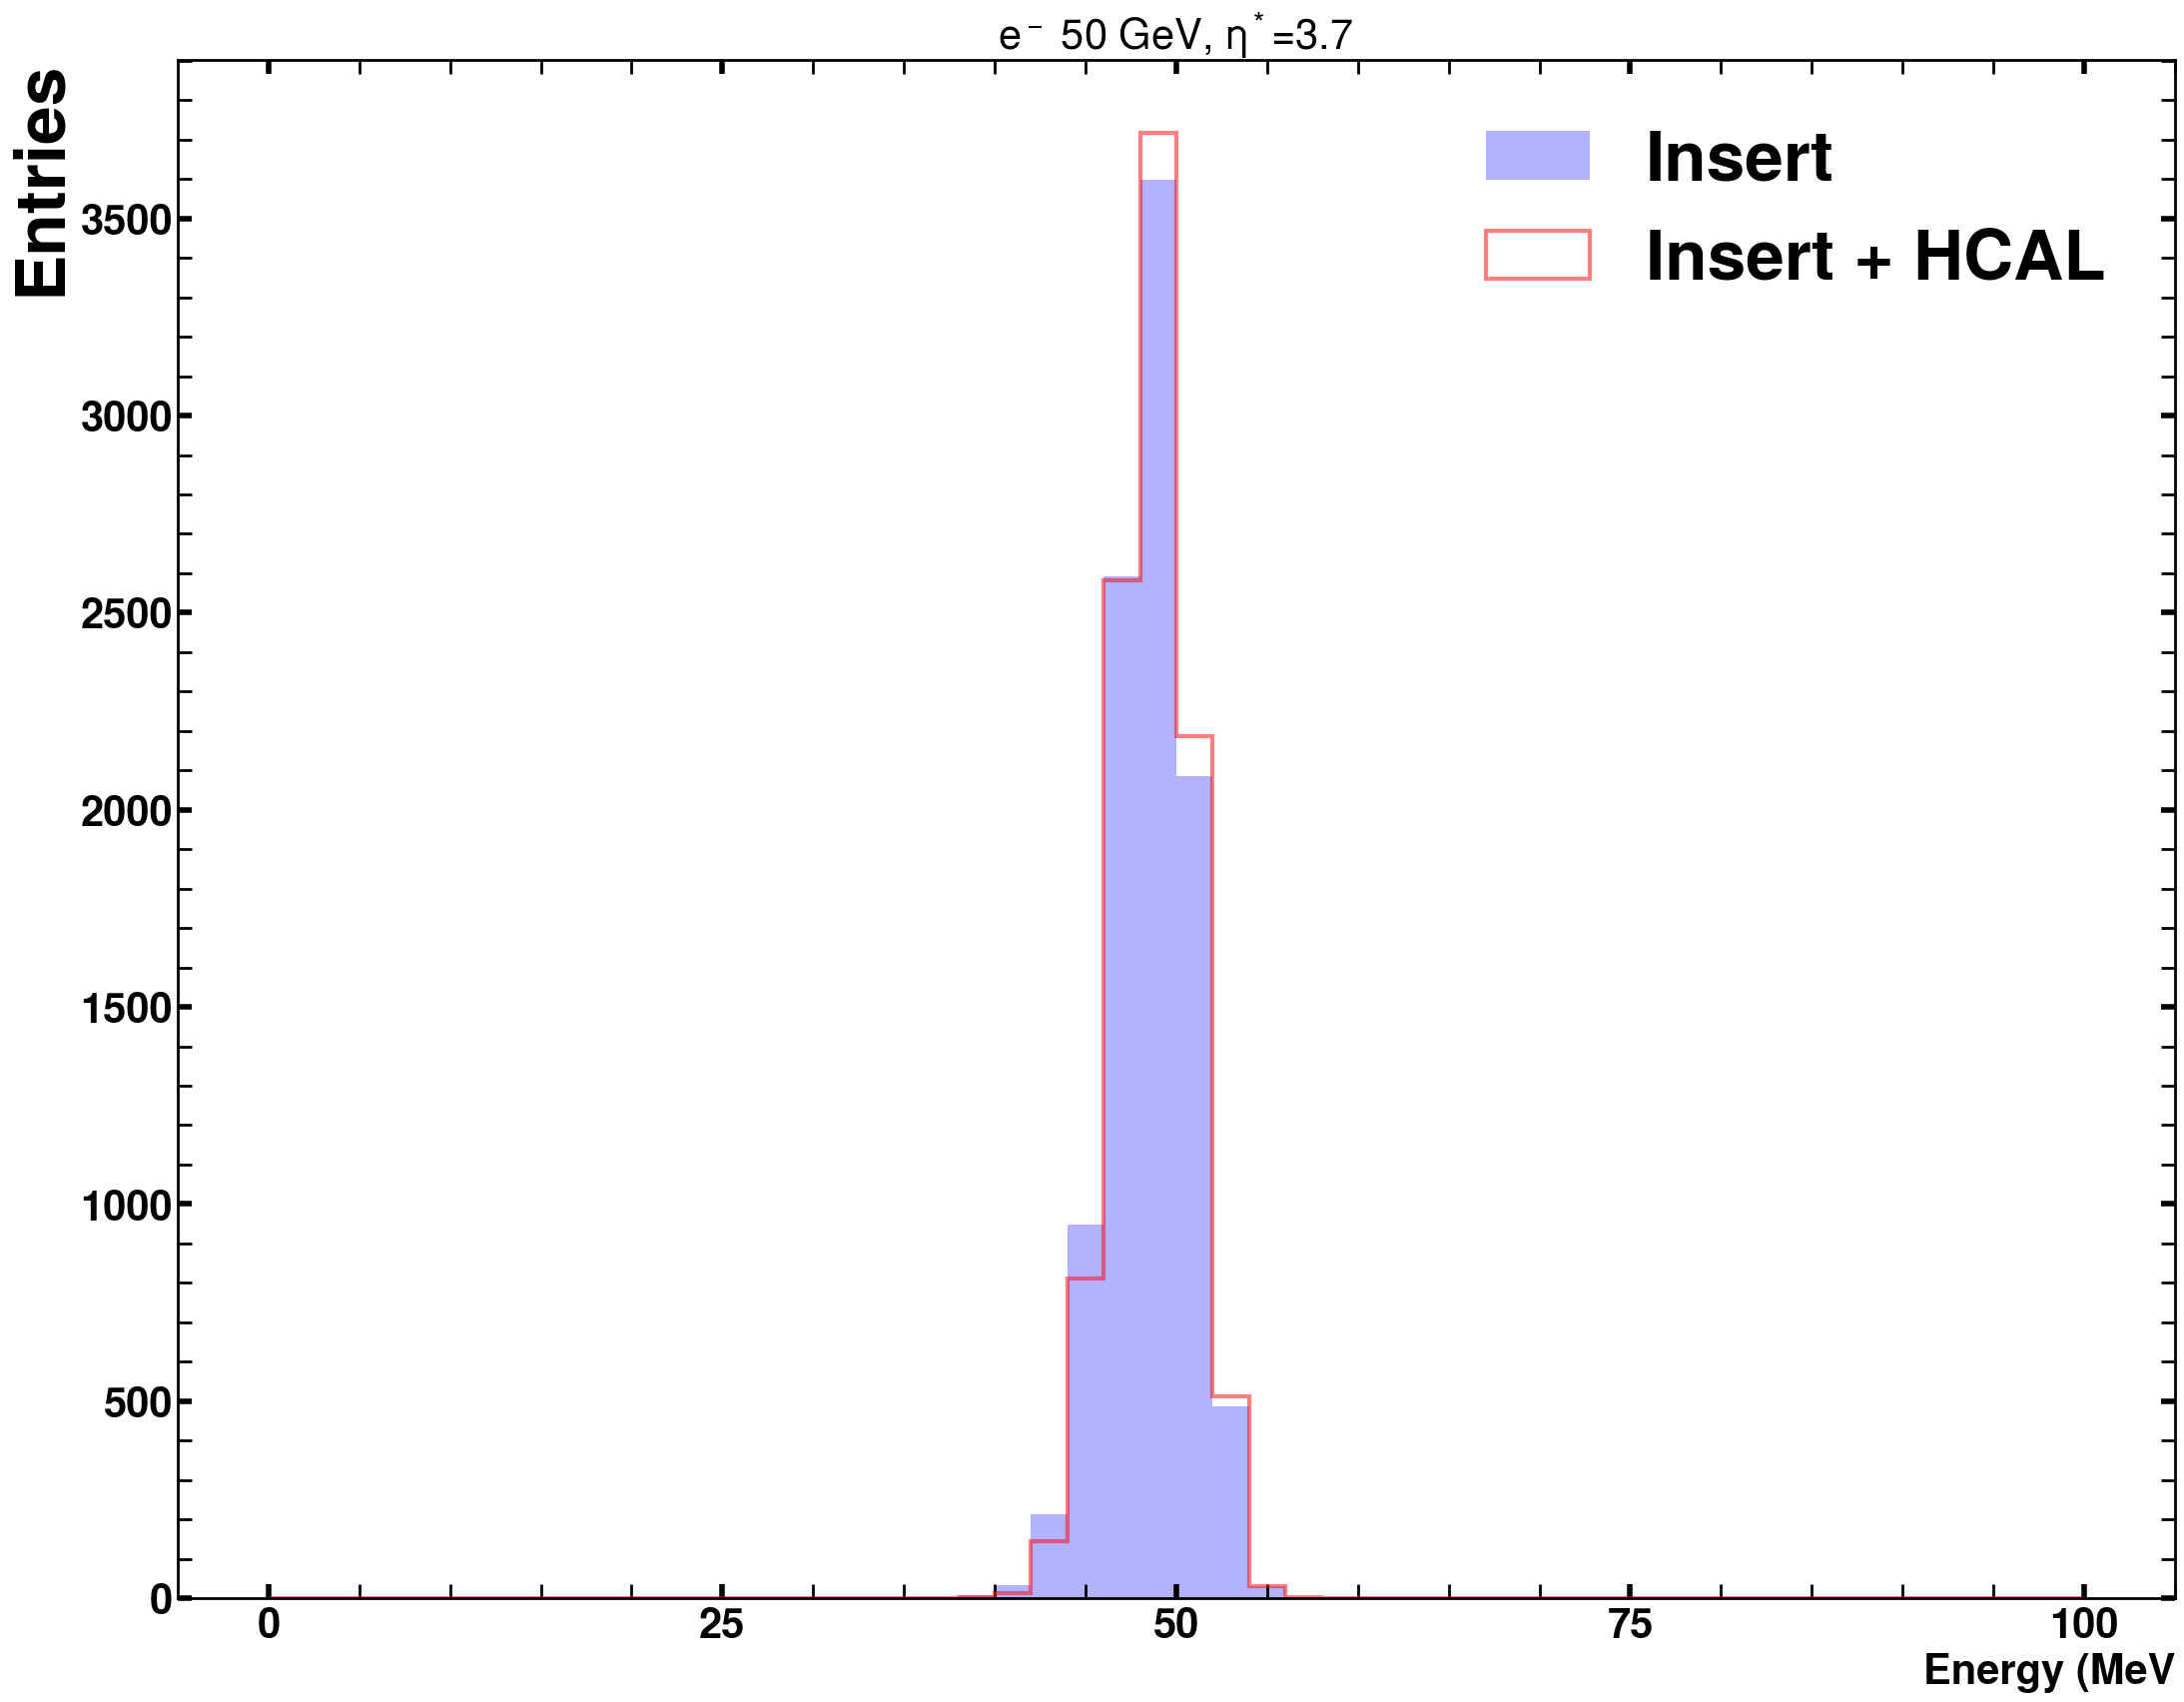

In [6]:
#FilePathReco="/Users/bishnukarki/EIC/HCAL_Insert_Sim_Files/"
#FilePathReco="/media/miguel/Elements/HCAL_Insert_Sim_Files/updated_hcal_layers/"
from matplotlib.lines import Line2D
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -0.5*((x - mean)/sigma)**2) /sigma
def get_fitted_mean_std(wt='off'):
    ## weight on for the weighted average
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(total events selected = events/fraction)
    fileindex="deg" 
    fig,ax = plt.subplots(1,1,figsize=(25,20),sharey=True,sharex=True)
    plt.subplots_adjust(left=0.1,  wspace=0.0, hspace=0.)
        
    
    min_range=0
    particles=['e-']
    theta=2.83
    eta=plots.get_eta(theta)
   
    energies=[50]
    if wt=='on':
        sampling_fraction_hcali=0.0098*1000 #(GeV-1)
        sampling_fraction_hcal=0.022*1000  #(GeV-1)
        max_range=100
        nbins=50
        xlabel="Energy (GeV)"
    else:
        sampling_fraction_hcali=1 #(GeV-1)
        sampling_fraction_hcal=1  #(GeV-1)
        max_range=100
        nbins=50
        xlabel="Energy (MeV"
        
    xdiv=int((max_range-min_range)/4)

    for ienergy in energies:
        index = energies.index(ienergy)
        
       
        for particle in particles:
            plt_i=particles.index(particle)
            
            print(plt_i,'     ',index)
            greek_particle=plots.get_greek_particle(particle)
            
            ### FOR INSERT 
            ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_ECAL_Insert\
            (fileindex,fraction,FilePathReco,ienergy,theta,particle, Time_Threshold,Energy_Threshold)
            
             #ene_good=good_energy
            ene_total_Insert_temp = np.sum(ene_good,axis=-1)
            ene_total_Insert = np.divide(ene_total_Insert_temp,sampling_fraction_hcali)
         
            ene_average = ak.mean(ene_good,axis=-1)
            mean_guess_Insert=np.mean(ene_total_Insert)
            sigma_guess_Insert=np.std(ene_total_Insert)
            
            # ECAL 
            
            ene_hcal,time_hcal,PosRecoX_hcal,PosRecoY_hcal,PosRecoZ_hcal,mass_hcal,mom_hcal,energy_gen_hcal, \
            phi_hcal,ene_good_hcal=plots.read_rootfile_ECAL(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                             Time_Threshold,Energy_Threshold)
                                                             
            
            ### FOR INSERT AND HCAL SUM ENERGY
            ene_total_hcal_only_temp = ak.sum(ene_good_hcal,axis=-1)
            ene_total_hcal_only = np.divide(ene_total_hcal_only_temp,sampling_fraction_hcal)
            
            ene_total_hcal=np.add(ene_total_hcal_only,ene_total_Insert)

            mean_guess_hcal=np.mean(ene_total_hcal)
            sigma_guess_hcal=np.std(ene_total_hcal)
            
        
            #plots.XY_plot2D(ene_total_Insert, ene_total_hcal,ienergy, particle)
            #plots.hcal_hcali_plot2D_energy(ene_total_Insert, ene_total_hcal,ienergy, particle)
            
            #FOR INSERT
            count, bins,_= ax.hist(np.array(ene_total_Insert),bins=nbins,alpha=0.3,range=(min_range,max_range),\
                                          label='Insert',linewidth='1',color='b')


            binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
              ## CHOOSE THE DATA POINTS WITHIN GIVEN SIGMAS FOR FITTING
            mask=(binscenters>(mean_guess_Insert-FIT_SIGMA*sigma_guess_Insert)) & \
            (binscenters<(mean_guess_Insert+FIT_SIGMA*sigma_guess_Insert))
            
            
             # PARAMETER BOUNDS ARE NOT USED FOR NOW INSERT
            param_bounds=([-np.inf,-np.inf,-np.inf], [np.inf,np.inf,np.inf])
            popt, pcov = curve_fit(gaussian, binscenters[mask], count[mask],p0=[np.max(count),mean_guess_Insert,\
                                            sigma_guess_Insert], bounds=param_bounds)
            
            
            # FOR HCAL  + HCAL Insert
            count_hcal, bins_hcal,_= ax.hist(np.array(ene_total_hcal),bins=nbins,alpha=0.5,range=(min_range,max_range),\
                                                    label='Insert + HCAL',linewidth='3',color='red', histtype='step')
            binscenters_hcal = np.array([0.5 * (bins_hcal[i] + bins_hcal[i+1]) for i in range(len(bins_hcal)-1)])
            #print ()
            mask_hcal=(binscenters_hcal>(mean_guess_hcal-FIT_SIGMA*sigma_guess_hcal)) & \
            (binscenters_hcal<(mean_guess_hcal+FIT_SIGMA*sigma_guess_hcal))
            
 
            max_height=np.max(count)
           
        
             # PARAMETER BOUNDS ARE NOT USED FOR NOW HCAL + HCAL_INSERT

            
            popt_hcal, pcov_hcal = curve_fit(gaussian, binscenters_hcal[mask_hcal], count_hcal[mask_hcal],\
                                             p0=[np.max(count_hcal),mean_guess_hcal, sigma_guess_hcal], \
                                             bounds=param_bounds)
            
            
            
            
           
            
            #ax.set_title("{0} {1} GeV, $\eta^*$={2:.2f} ".format(greek_particle,ienergy,etas))#  $\eta*$=3.7
            ax.set_title("{0} {1} GeV, $\eta^*$={2:.1f} ".format(greek_particle,ienergy,eta))#  $\eta*$=3.7
            ax.xaxis.set_major_locator(MultipleLocator(xdiv))
            #ax[index].set_xlabel("Event energy (MeV)",fontsize=30)

            ax.set_xlabel(xlabel,fontsize=30)
            ax.set_ylabel("Entries",fontsize=50)
            
            
            
            
            
            #FigName='Fit_SimEnergy_4plots.png'
            plt.legend(loc='upper right',fontsize=50)
            #plt.axvline(x =popt_hcal[1] , color = 'r', label = 'axvline - full height',linestyle='dashed')
            #plt.axvline(x =popt[1] , color = 'b', label = 'axvline - full height',linestyle='dashed')
            #plt.savefig(f"{PathToPlot}{FigName}")
            
        


#plt.subplots_adjust(wspace=0, hspace=0)
#plt.legend()
plt.show()    

get_fitted_mean_std('off')